In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
april = pd.read_csv('Uber-dataset/uber-raw-data-apr14.csv')
may = pd.read_csv('Uber-dataset/uber-raw-data-may14.csv')
jun = pd.read_csv('Uber-dataset/uber-raw-data-jun14.csv')
jul = pd.read_csv('Uber-dataset/uber-raw-data-jul14.csv')
aug = pd.read_csv('Uber-dataset/uber-raw-data-aug14.csv')
sep = pd.read_csv('Uber-dataset/uber-raw-data-sep14.csv')

In [22]:
df = pd.concat([april, may, jun, jul, aug, sep])

In [23]:
df.shape

(4534327, 4)

In [24]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [26]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [27]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [28]:
df['Date/Time'].unique().shape

(260093,)

In [29]:
df.duplicated().sum()

82581

In [30]:
df.drop_duplicates(inplace=True)
df.shape

(4451746, 4)

In [31]:
import seaborn as sns
sns.set()

In [32]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


<AxesSubplot:xlabel='Base'>

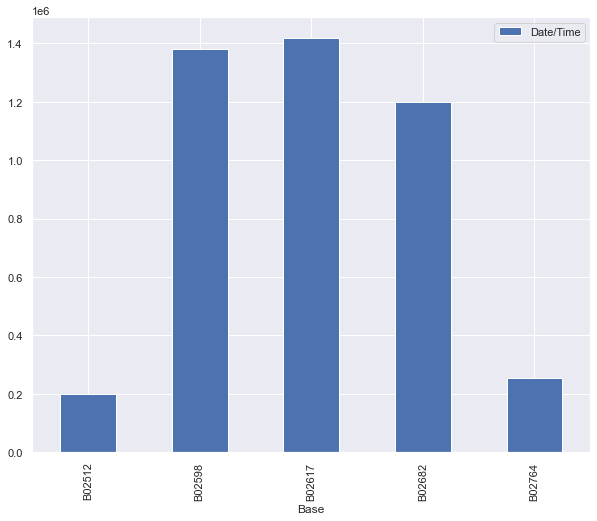

In [33]:
df.groupby('Base').agg({'Date/Time': 'count'}).plot(kind='bar', figsize=(10, 8))

In [34]:
df.describe()

,Lat,Lon
count,4.451746e+06,4.451746e+06
mean,4.073924e+01,-7.397304e+01
std,3.984343e-02,5.721967e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


(40.0, 41.2)

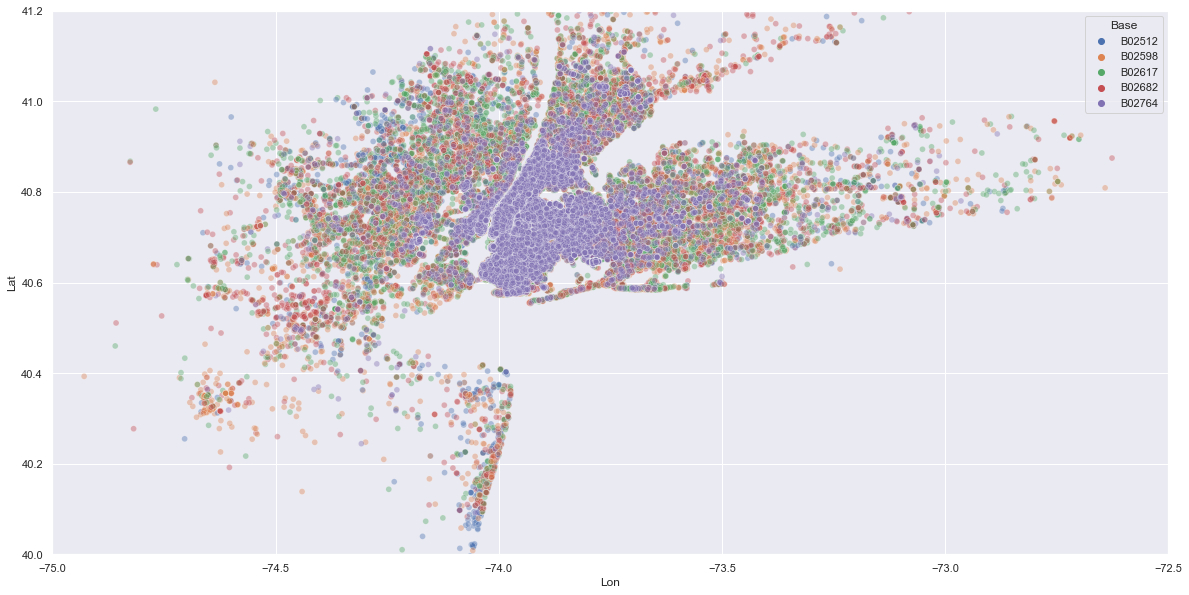

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,y='Lat',x='Lon',alpha=0.4,hue='Base')
plt.xlim(-75,-72.5)
plt.ylim(40.0,41.2)

In [36]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [37]:
# replace Base with 0-4
df['Base_id'] = df['Base'].replace(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], [0, 1, 2, 3, 4])

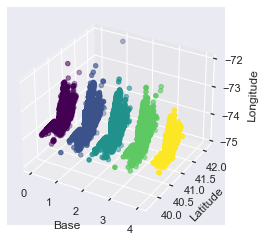

<Figure size 720x576 with 0 Axes>

In [38]:
# 3d plot matplotlib
fig = plt.figure()
plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Base_id'],df['Lat'], df['Lon'], c=df['Base_id'], cmap='viridis', marker='o')
ax.set_xlabel('Base')
ax.set_ylabel('Latitude')
ax.set_zlabel('Longitude')
plt.show()

In [39]:
df['month'] = df['Date/Time'].dt.month
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

In [40]:
df.head()

,Date/Time,Lat,Lon,Base,Base_id,month,weekday,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,4,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,4,Tuesday,1,0,33


<AxesSubplot:xlabel='weekday', ylabel='count'>

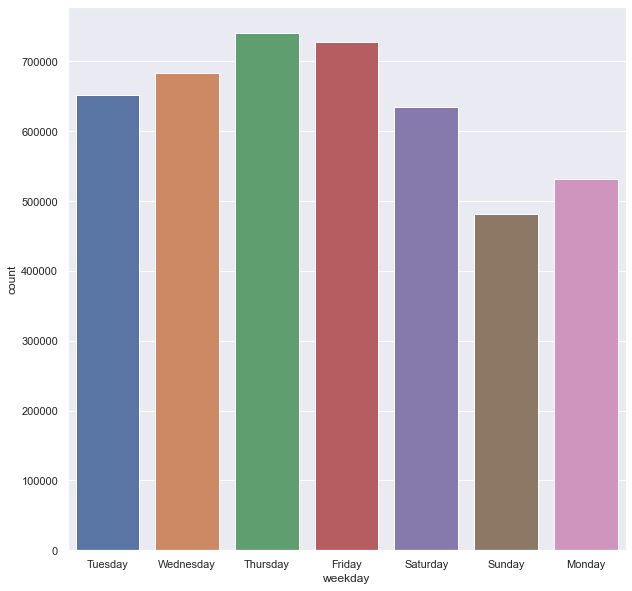

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='weekday')

In [42]:
df['weekday'].value_counts()

Thursday     741372
Friday       727532
Wednesday    683604
Tuesday      651753
Saturday     634194
Monday       532133
Sunday       481158
Name: weekday, dtype: int64

In [43]:
df['month'].value_counts()

9    1004099
8     813393
7     781969
6     653158
5     642360
4     556767
Name: month, dtype: int64

In [44]:
df.groupby('month')['hour'].count()

month
4     556767
5     642360
6     653158
7     781969
8     813393
9    1004099
Name: hour, dtype: int64

In [45]:
df.groupby('day')['hour'].count()

day
1     125282
2     140767
3     140688
4     138361
5     144547
6     137313
7     140983
8     143530
9     152500
10    149715
11    146135
12    157725
13    153991
14    137656
15    150892
16    156020
17    149828
18    148509
19    150226
20    141363
21    138593
22    144160
23    152976
24    141528
25    149783
26    150403
27    142815
28    138413
29    146267
30    164040
31     76737
Name: hour, dtype: int64

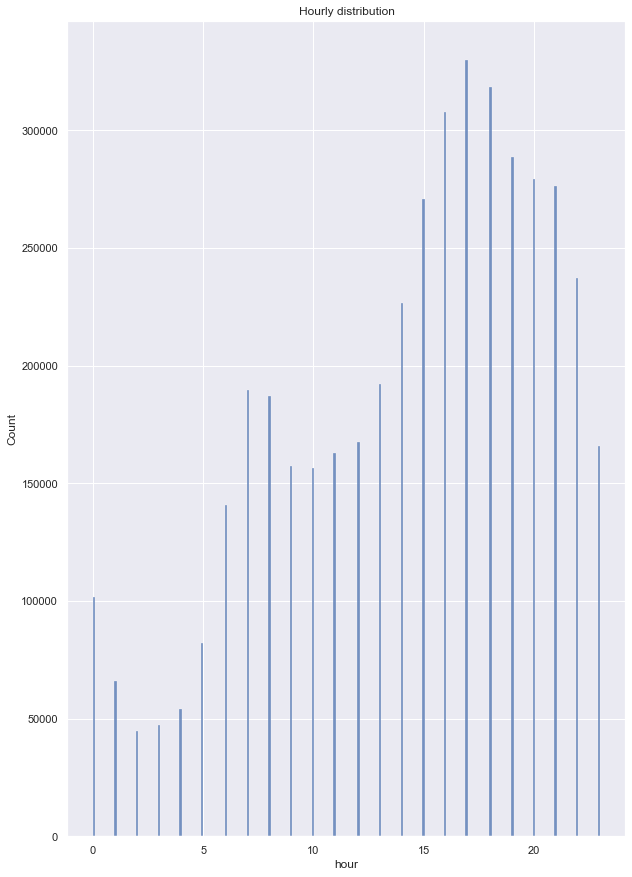

In [46]:
plt.figure(figsize=(10,15))
sns.histplot(df['hour'])
plt.title('Hourly distribution')
plt.show()

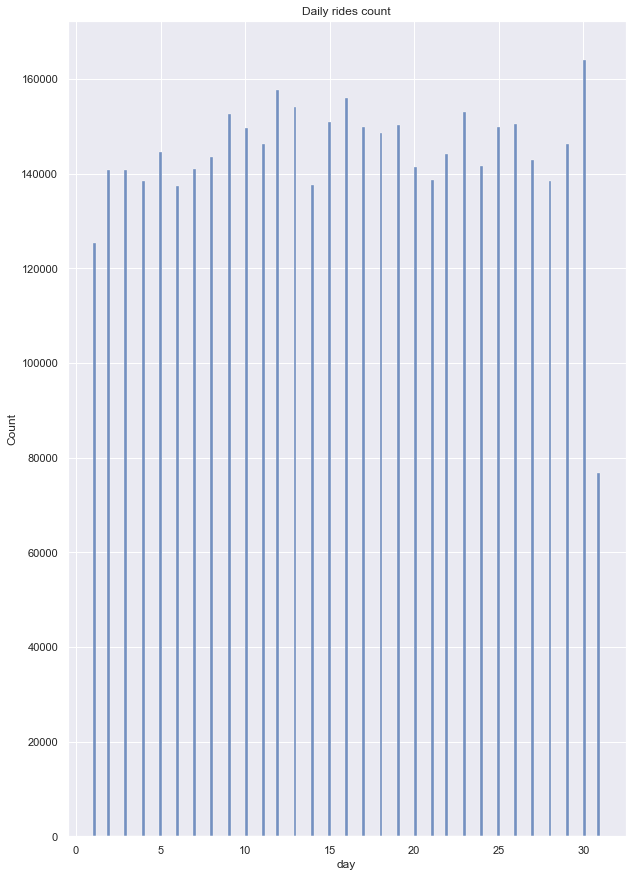

In [47]:
plt.figure(figsize=(10,15))
sns.histplot(df['day'])
plt.title('Daily rides count')
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

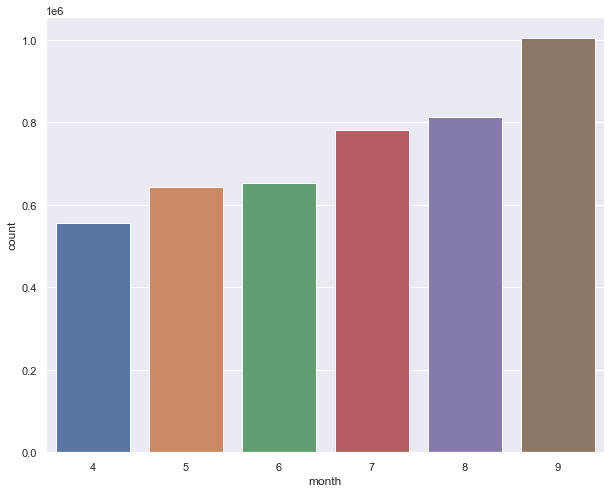

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='month')

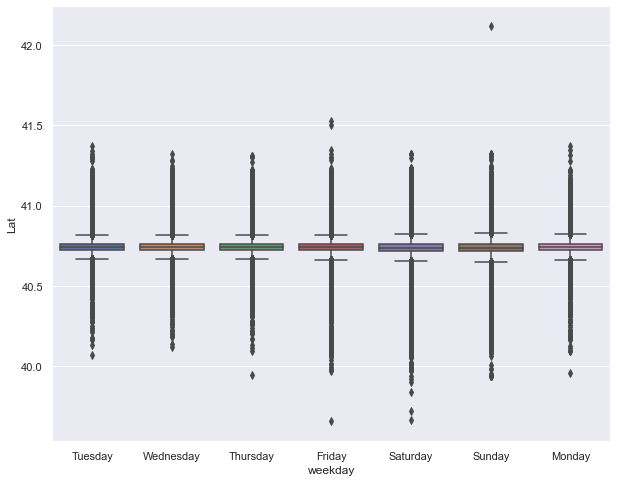

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='weekday',y='Lat')
plt.show()

Text(0, 0.5, 'Number of rides')

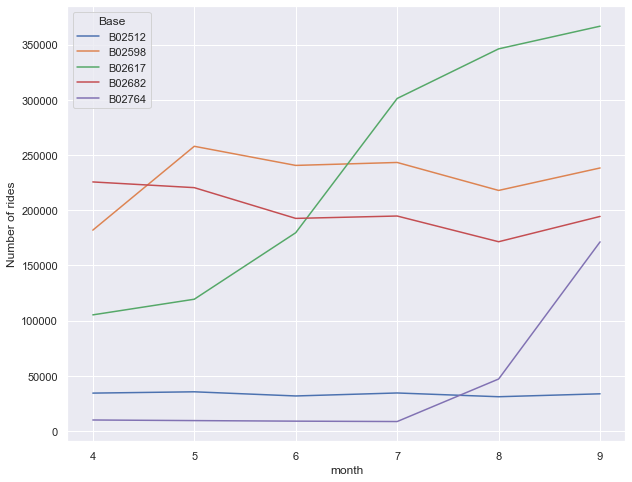

In [50]:
base = df.groupby(['Base','month'])['Date/Time'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=base,x='month',y='Date/Time',hue='Base')
plt.ylabel('Number of rides')

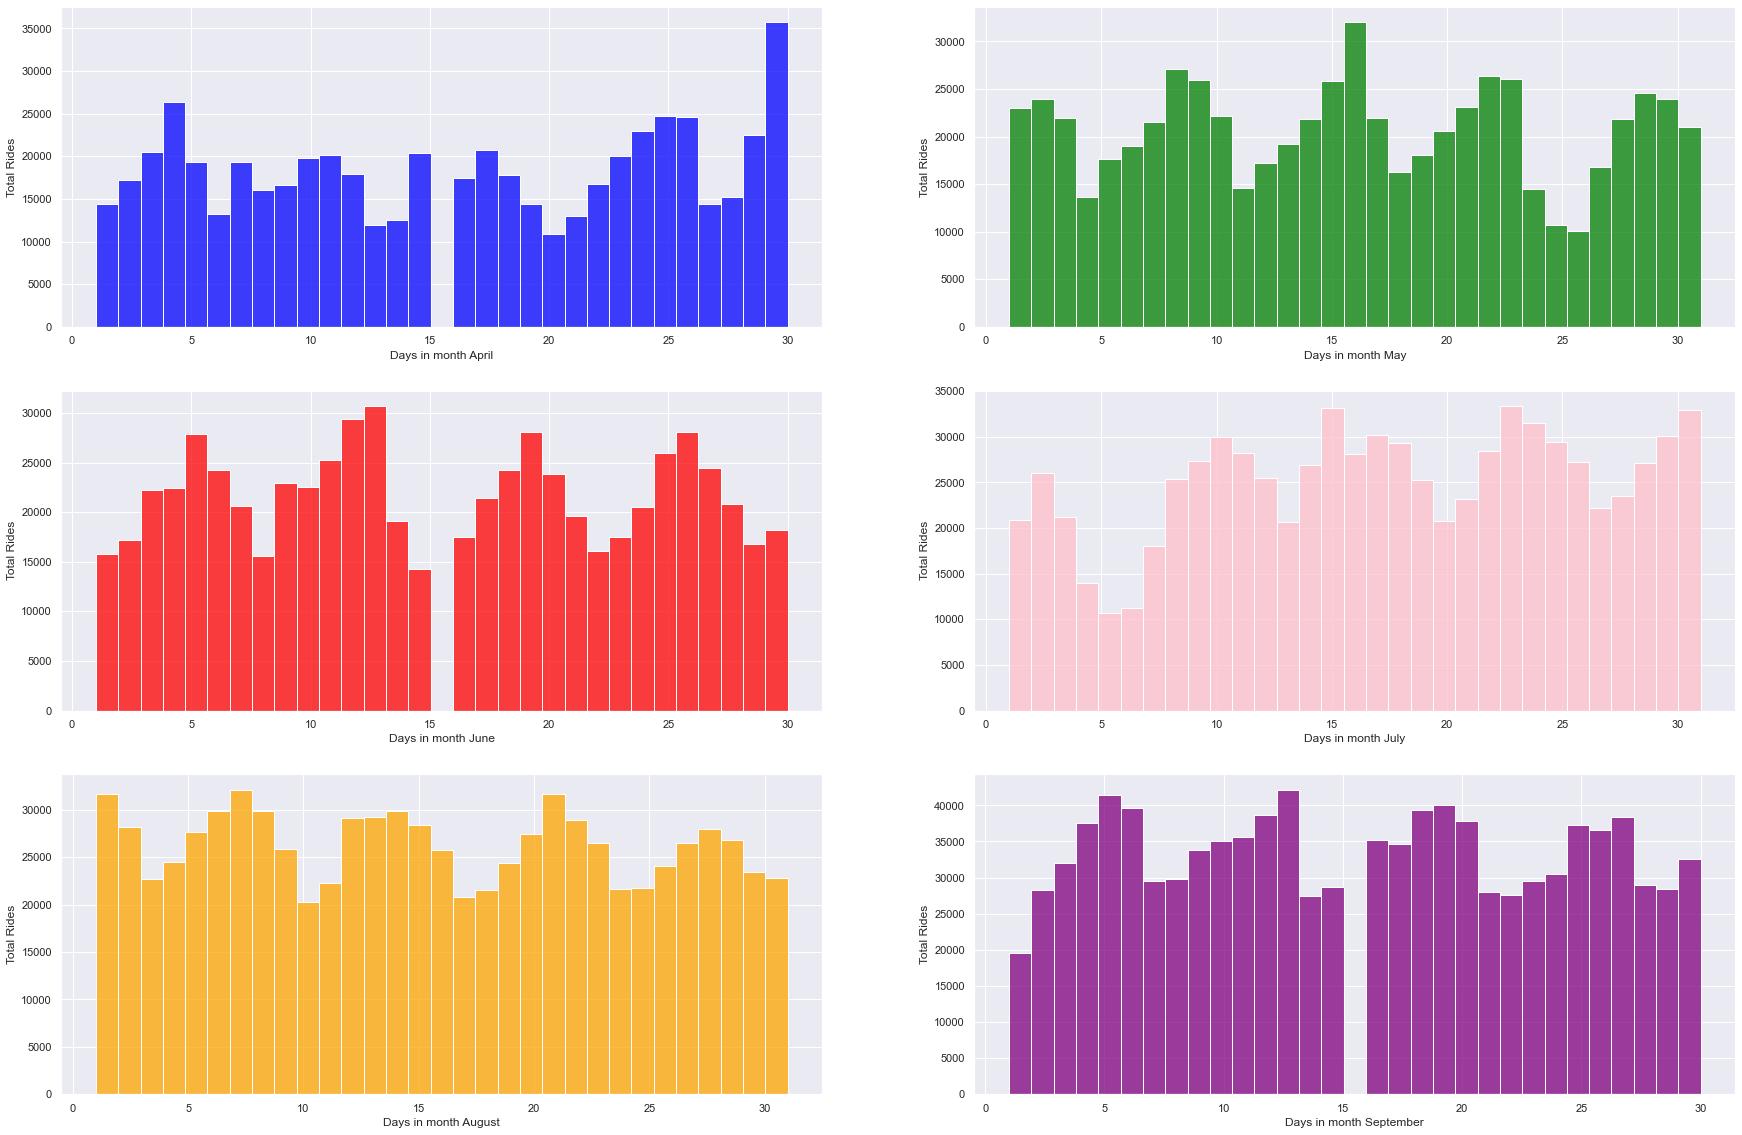

In [51]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
sns.histplot(data=df,x=df[df['month'] == 4]['day'],bins=31,color='blue')
plt.xlabel('Days in month April')
plt.ylabel('Total Rides')
plt.subplot(3,2,2)
sns.histplot(data=df,x=df[df['month'] == 5]['day'],bins=31,color='green')
plt.xlabel('Days in month May')
plt.ylabel('Total Rides')
plt.subplot(3,2,3)
sns.histplot(data=df,x=df[df['month'] == 6]['day'],bins=31,color='red')
plt.xlabel('Days in month June')
plt.ylabel('Total Rides')
plt.subplot(3,2,4)
sns.histplot(data=df,x=df[df['month'] == 7]['day'],bins=31,color='pink')
plt.xlabel('Days in month July')
plt.ylabel('Total Rides')
plt.subplot(3,2,5)
sns.histplot(data=df,x=df[df['month'] == 8]['day'],bins=31,color='orange')
plt.xlabel('Days in month August')
plt.ylabel('Total Rides')
plt.subplot(3,2,6)
sns.histplot(data=df,x=df[df['month'] == 9]['day'],bins=31,color='purple')
plt.xlabel('Days in month September')   
plt.ylabel('Total Rides')
plt.show()


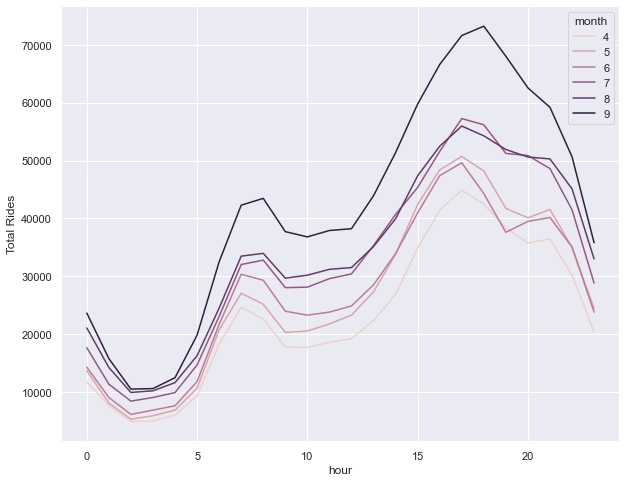

In [52]:
dfx = df.groupby(['month','hour'])['Date/Time'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(data=dfx,x='hour',y='Date/Time',hue='month')
plt.ylabel('Total Rides')
plt.show()

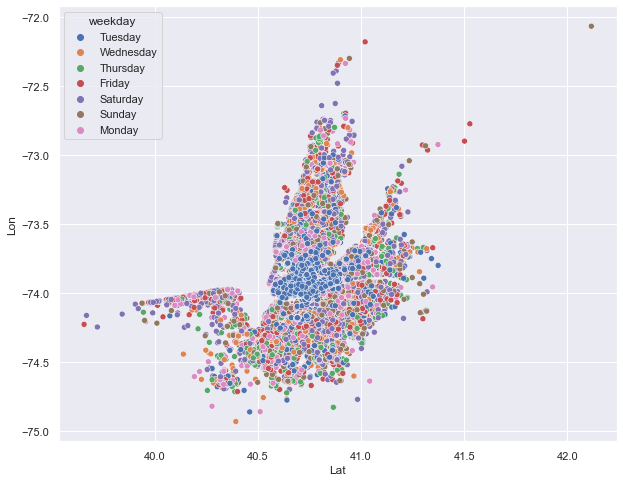

In [53]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Lat',y='Lon',hue='weekday')
plt.show()

In [68]:
daily_pickups = df.groupby(['month', 'day'])['hour'].count()
print(f'Busiest Day: {daily_pickups.idxmax()}') 
print(f'Number of pickups: {daily_pickups.max()}')

Busiest Day: (9, 13)
Number of pickups: 42169


In [69]:
weekly_pickups = df.groupby(['weekday', 'day'])['hour'].count()
print(f'Busiest Day: {weekly_pickups.idxmax()}')
print(f'Number of pickups: {weekly_pickups.max()}')

Busiest Day: ('Wednesday', 30)
Number of pickups: 65852


In [57]:
import datashader as ds
import colorcet as cc
import folium
from folium.plugins import HeatMapWithTime

Number of Pickups: 4419110


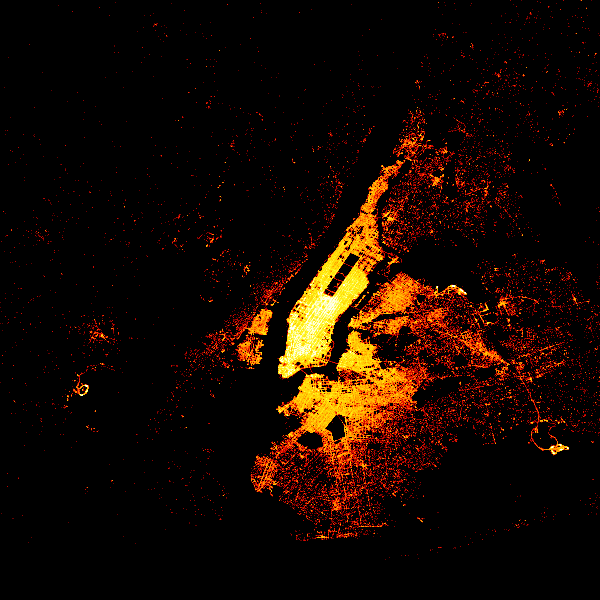

In [67]:
focus_on = df[df['Lon'].between(-74.25, -73.75) & df['Lat'].between(40.5, 41)]
print(f'Number of Pickups: {len(focus_on)}')

pickup_points = ds.Canvas().points(focus_on, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.fire), "black")

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [60]:
df.head()

,Date/Time,Lat,Lon,Base,Base_id,month,weekday,day,hour,minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,4,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,4,Tuesday,1,0,33


In [61]:
X = df.drop(['Date/Time','Lat','Lon','Base','Base_id','weekday'],axis=1)
y = df['Lat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [62]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.intercept_)

print(reg.coef_)

40.74216069045465
[-3.08007743e-04 -1.55996818e-05 -3.46953880e-05 -2.47257563e-06]


In [63]:
y_pred = reg.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.027564979987401254
Mean Squared Error: 0.0016013684551210764
Root Mean Squared Error: 0.04001710203301929
R2 Score: 0.0002367044593566403


<AxesSubplot:xlabel='Date/Time', ylabel='Lat'>

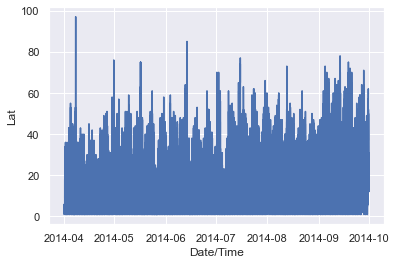

In [81]:
df2 = df.groupby('Date/Time')['Lat'].count()
sns.lineplot(data=df2)